# Análisis Exploratorio de Datos


## Importacion de librerias


In [2]:
import os
import numpy as np
import pandas as pd


## Cargar datos


In [6]:
data = pd.read_csv("SpotifyFeatures.csv")
print(data.info())

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

- genre: Género musical de la canción.
- artist_name: Nombre del artista.
- track_name: Nombre de la canción.
- track_id: Identificador único de la canción.
- popularity: Popularidad de la canción (valor numérico).
- acousticness: Medida de cuán acústica es la canción.
- danceability: Facilidad para bailar la canción.
- duration_ms: Duración de la canción en milisegundos.
- energy: Nivel de energía de la canción.
- instrumentalness: Probabilidad de que la canción sea instrumental.
- key: Tono musical de la canción.
- liveness: Presencia de público en la grabación.
- loudness: Volumen general de la canción (en decibelios).
- mode: Modo musical (mayor o menor).
- speechiness: Presencia de palabras habladas en la canción.
- tempo: Tempo de la canción (en BPM).
- time_signature: Compás de la canción.
- valence: Medida de positividad o felicidad transmitida por la canción.


## Limpieza de datos


In [7]:
# Eliminar filas con valores nulos en el DataFrame
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232724 non-null  object 
 1   artist_name       232724 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232724 non-null  object 
 4   popularity        232724 non-null  int64  
 5   acousticness      232724 non-null  float64
 6   danceability      232724 non-null  float64
 7   duration_ms       232724 non-null  int64  
 8   energy            232724 non-null  float64
 9   instrumentalness  232724 non-null  float64
 10  key               232724 non-null  object 
 11  liveness          232724 non-null  float64
 12  loudness          232724 non-null  float64
 13  mode              232724 non-null  object 
 14  speechiness       232724 non-null  float64
 15  tempo             232724 non-null  float64
 16  time_signature    232724 

Había un único con un valor nulo correspondiente al nombre de la canción, se decidió borrar ese registro teniendo en total 232724 registros


### Estadisticas


In [9]:
# Mostrar estadísticas descriptivas para las variables numéricas
display(data.describe())

# Mostrar estadísticas para variables categóricas
display(data.describe(include=['object']))

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232724.000000,232724.000000,232724.000000,2.327240e+05,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000
mean,41.127490,0.368562,0.554366,2.351218e+05,0.570958,0.148302,0.215010,-9.569896,0.120765,117.666494,0.454919
std,18.189986,0.354768,0.185608,1.189359e+05,0.263456,0.302769,0.198273,5.998215,0.185519,30.898942,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828562e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.777500,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054500,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


,genre,artist_name,track_name,track_id,key,mode,time_signature
count,232724,232724,232724,232724,232724,232724,232724
unique,27,14564,148614,176773,12,2,5
top,Comedy,Giuseppe Verdi,Home,0wY9rA9fJkuESyYm9uzVK5,C,Major,4/4
freq,9681,1394,100,8,27583,151743,200759


## Visualización


### Correlación

Gráfico de la correlación de Pearson de cada variable respecto a la popularidad


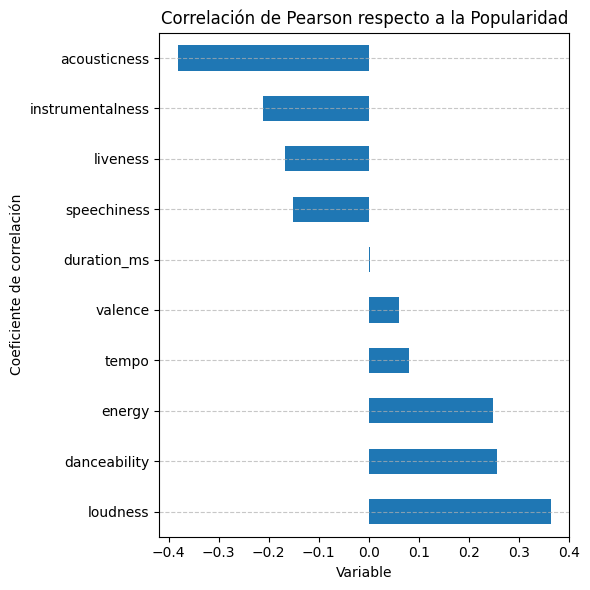

In [12]:
import matplotlib.pyplot as plt

# Calcular la correlación de Pearson de cada variable numérica respecto a 'popularity'
correlations = data.corr(numeric_only=True)['popularity'].sort_values(ascending=False)

# Excluir la autocorrelación
correlations = correlations.drop('popularity')

# Graficar las correlaciones
plt.figure(figsize=(6, 6))
correlations.plot(kind='barh')
plt.title('Correlación de Pearson respecto a la Popularidad')
plt.ylabel('Coeficiente de correlación')
plt.xlabel('Variable')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()